# EXPLORATION DATA ANALYSIS

### BY Agboola Quam

**Performing ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’, trying to find out the weak areas where I can work to
make more profit.** 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, print statistics
store = pd.read_csv('SampleSuperstore.csv')
store.sample(10)

Ship Mode      Segment        Country           City       State  \
4690     First Class     Consumer  United States         Tucson     Arizona   
1314  Standard Class    Corporate  United States    Los Angeles  California   
4323  Standard Class     Consumer  United States          Akron        Ohio   
3540        Same Day    Corporate  United States      Henderson    Kentucky   
8231    Second Class     Consumer  United States  Sandy Springs     Georgia   
3271    Second Class    Corporate  United States        Visalia  California   
1077    Second Class     Consumer  United States        Seattle  Washington   
4647  Standard Class  Home Office  United States  New York City    New York   
8499    Second Class     Consumer  United States        Yonkers    New York   
5895  Standard Class  Home Office  United States    Los Angeles  California   

      Postal Code Region         Category Sub-Category     Sales  Quantity  \
4690        85705   West       Technology  Accessories    71.976         3   
1314        90032   West  Office Supplies        Paper    38.880         6   
4323        44312   East  Office Supplies      Binders     2.286         2   
3540        42420  South  Office Supplies        Paper    45.360         7   
8231        30328  South        Furniture    Bookcases  1266.860         7   
3271        93277   West       Technology  Accessories     7.920         8   
1077        98105   West  Office Supplies   Appliances   119.960         2   
4647        10009   East        Furniture       Chairs   434.646         3   
8499        10701   East  Office Supplies      Binders    49.632         6   
5895        90049   West  Office Supplies       Labels    44.400         3   

      Discount    Profit  
4690       0.2   21.5928  
1314       0.0   18.6624  
4323       0.7   -1.6764  
3540       0.0   21.7728  
8231       0.0  291.3778  
3271       0.0    3.4848  
1077       0.0   33.5888  
4647       0.1   62.7822  
8499       0.2   16.7508  
5895       0.0   22.2000

In [4]:
#1 Checking the dimension of the store dataframe
store.shape

(9994, 13)

**We have 9994 rows and 13 columns in our data frame**

In [5]:
#2 Checking the data structure and also if there is missing value in any row in the data frame
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#missing data
total = store.isnull().sum().sort_values(ascending=False)
percent = (store.isnull().sum()/store.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
Profit            0      0.0
Discount          0      0.0
Quantity          0      0.0
Sales             0      0.0
Sub-Category      0      0.0
Category          0      0.0
Region            0      0.0
Postal Code       0      0.0
State             0      0.0
City              0      0.0
Country           0      0.0
Segment           0      0.0
Ship Mode         0      0.0

**It can be seen that no missing value exist in our dataframe**

In [7]:
#Changing all the column names to lowercase and underscore for consistency and easy data cleaning.
store.rename(columns={'Profit':'profit','Discount':'discount','Quantity':'quantity','Sales':'sales','Sub-Category':'sub_category','Category':'category','Region':'region','Postal Code':'postal_code','State':'state','City':'city','Country':'country','Segment':'segment','Ship Mode':'ship_mode'},inplace=True)

In [8]:
store.head(2)

ship_mode   segment        country       city     state  postal_code  \
0  Second Class  Consumer  United States  Henderson  Kentucky        42420   
1  Second Class  Consumer  United States  Henderson  Kentucky        42420   

  region   category sub_category   sales  quantity  discount    profit  
0  South  Furniture    Bookcases  261.96         2       0.0   41.9136  
1  South  Furniture       Chairs  731.94         3       0.0  219.5820

In [9]:
store.ship_mode=store.ship_mode.astype('category')

In [10]:
store.segment=store.segment.astype('category')

In [11]:
store.country=store.country.astype('category')

In [12]:
store.city=store.city.astype('category')

In [13]:
store.state=store.state.astype('category')

In [14]:
store.region=store.region.astype('category')

In [15]:
store.category=store.category.astype('category')

In [16]:
store.sub_category=store.sub_category.astype('category')

In [17]:
store.dtypes

ship_mode       category
segment         category
country         category
city            category
state           category
postal_code        int64
region          category
category        category
sub_category    category
sales            float64
quantity           int64
discount         float64
profit           float64
dtype: object

In [18]:
store.columns.tolist()

['ship_mode',
 'segment',
 'country',
 'city',
 'state',
 'postal_code',
 'region',
 'category',
 'sub_category',
 'sales',
 'quantity',
 'discount',
 'profit']

In [19]:
#Checking unique values in each of our variable in the dataset
store.nunique()

ship_mode          4
segment            3
country            1
city             531
state             49
postal_code      631
region             4
category           3
sub_category      17
sales           5825
quantity          14
discount          12
profit          7287
dtype: int64

In [20]:
print(store.ship_mode.unique())
print(store.segment.unique())
print(store.region.unique())
print(store.category.unique())
print(store.sub_category.unique())

[Second Class, Standard Class, First Class, Same Day]
Categories (4, object): [Second Class, Standard Class, First Class, Same Day]
[Consumer, Corporate, Home Office]
Categories (3, object): [Consumer, Corporate, Home Office]
[South, West, Central, East]
Categories (4, object): [South, West, Central, East]
[Furniture, Office Supplies, Technology]
Categories (3, object): [Furniture, Office Supplies, Technology]
[Bookcases, Chairs, Labels, Tables, Storage, ..., Envelopes, Fasteners, Supplies, Machines, Copiers]
Length: 17
Categories (17, object): [Bookcases, Chairs, Labels, Tables, ..., Fasteners, Supplies, Machines, Copiers]


## DESCRIPTIVE STATISTICS

In [21]:
store.describe()

postal_code         sales     quantity     discount       profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

### (1) SALES
**Observations**

- We have 9994 customers in our dataset
- The minimum amount of sales made in the dataset by a customer is 0.444
- The maximum amount of sales made in the dataset by a customer is 22638.48
- The average sales in the dataset is 229.858001
- While the deviation is of 623.245101 sales

### (2) QUANTITY
**Observations**

- We have 9994 customers in our dataset
- The minimum quantity of product bought by a customer in the dataset is 1
- The maximum quantity of product bought by a customer in the dataset is 14
- The average quantity bought in the dataset is 3.789574
- While the deviation is of 2.225110 

### (3) DISCOUNT
**Observations**

- We have 9994 customers in our dataset
- The minimum discount in the dataset is 0
- The maximum discount in the dataset is 0.8
- The average discount in the dataset is 0.156203
- While the deviation is of 0.206452

### (4) PROFIT
**Observations**

- We have 9994 customers in our dataset
- The minimum profit made from the business in the dataset is a loss of 6599.978000
- The maximum profit made from the business in the dataset is a gain of 8399.976000
- The average profit made from the business in the dataset is 28.656896
- While the deviation is of 234.260108


## EXPLORATION DATA ANALYSIS

### (1) Univariate exploration
By looking at one variable at a time, we can build an intuition for how each variable is distributed before moving on to more complicated interactions between variables.

*Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?*

C:\Users\user\Downloads\Compressed\jj\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


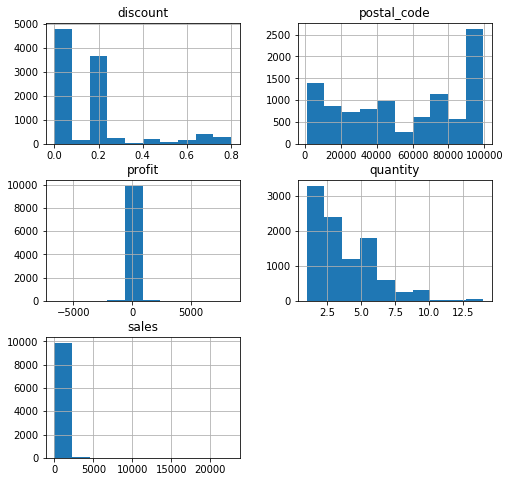

In [22]:
#Histogram plot for numeric variables in the titanic dataset
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
store.hist(ax=ax)
plt.show()

## BAR CHART AND PIE CHART OF QUALITATIVE VARIABLE IN THE DATASET

In [23]:
#Checking number of ship mode in the superstore dataset
pd.DataFrame(store.ship_mode.value_counts())

ship_mode
Standard Class       5968
Second Class         1945
First Class          1538
Same Day              543

In [24]:
#Checking number of segment in the superstore dataset
pd.DataFrame(store.segment.value_counts())

segment
Consumer        5191
Corporate       3020
Home Office     1783

In [25]:
#Checking number of cities in the superstore dataset
pd.DataFrame(store.city.value_counts())

city
New York City     915
Los Angeles       747
Philadelphia      537
San Francisco     510
Seattle           428
Houston           377
Chicago           314
Columbus          222
San Diego         170
Springfield       163
Dallas            157
Jacksonville      125
Detroit           115
Newark             95
Richmond           90
Jackson            82
Columbia           81
Aurora             68
Phoenix            63
Long Beach         61
Arlington          60
San Antonio        59
Louisville         57
Miami              57
Rochester          53
Charlotte          52
Henderson          51
Lakewood           49
Lancaster          46
Fairfield          45
...               ...
Holyoke             1
Jefferson City      1
Murrieta            1
Normal              1
Romeoville          1
Deer Park           1
Rogers              1
Rock Hill           1
Rochester Hills     1
Cedar Rapids        1
Champaign           1
Chapel Hill         1
Redwood City        1
Cheyenne            1
Redding             1
Citrus Heights      1
Portage             1
Port Orange         1
Pico Rivera         1
Commerce City       1
Conroe              1
Conway              1
Pensacola           1
Iowa City           1
Ormond Beach        1
Danbury             1
Orland Park         1
Davis               1
Ontario             1
Aberdeen            1

[531 rows x 1 columns]

In [26]:
#Checking number of segment in the superstore dataset
pd.DataFrame(store.state.value_counts())

state
California             2001
New York               1128
Texas                   985
Pennsylvania            587
Washington              506
Illinois                492
Ohio                    469
Florida                 383
Michigan                255
North Carolina          249
Virginia                224
Arizona                 224
Georgia                 184
Tennessee               183
Colorado                182
Indiana                 149
Kentucky                139
Massachusetts           135
New Jersey              130
Oregon                  124
Wisconsin               110
Maryland                105
Delaware                 96
Minnesota                89
Connecticut              82
Missouri                 66
Oklahoma                 66
Alabama                  61
Arkansas                 60
Rhode Island             56
Mississippi              53
Utah                     53
Louisiana                42
South Carolina           42
Nevada                   39
Nebraska                 38
New Mexico               37
Iowa                     30
New Hampshire            27
Kansas                   24
Idaho                    21
Montana                  15
South Dakota             12
Vermont                  11
District of Columbia     10
Maine                     8
North Dakota              7
West Virginia             4
Wyoming                   1

In [27]:
#Checking number of region in the superstore dataset
pd.DataFrame(store.region.value_counts())

region
West       3203
East       2848
Central    2323
South      1620

In [28]:
#Checking number of segment in the superstore dataset
pd.DataFrame(store.category.value_counts())

category
Office Supplies      6026
Furniture            2121
Technology           1847

In [29]:
#Checking number of segment in the superstore dataset
pd.DataFrame(store.sub_category.value_counts())

sub_category
Binders              1523
Paper                1370
Furnishings           957
Phones                889
Storage               846
Art                   796
Accessories           775
Chairs                617
Appliances            466
Labels                364
Tables                319
Envelopes             254
Bookcases             228
Fasteners             217
Supplies              190
Machines              115
Copiers                68

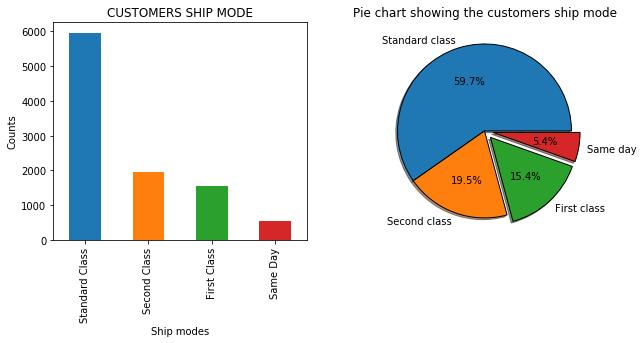

In [30]:
#Checking counts in our dataset with bar chart
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
store.ship_mode.value_counts().plot(kind='bar',title='CUSTOMERS SHIP MODE',color=['C0','C1','C2','C3']);
plt.xlabel('Ship modes')
plt.ylabel('Counts');

plt.subplot(1,2,2);
txn_values=[5968,1945,1538,543]
txn_labels=["Standard class","Second class","First class","Same day"]
plt.axis("equal")
plt.title("Pie chart showing the customers ship mode")
plt.pie(txn_values,labels=txn_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0,0,0.1,0.1],wedgeprops={'edgecolor':'black'});

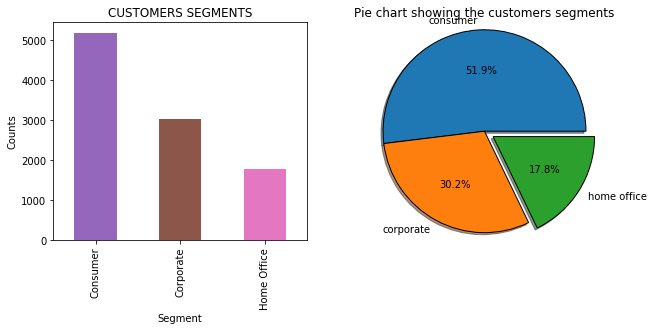

In [31]:
#Checking counts in our dataset with bar chart
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
store.segment.value_counts().plot(kind='bar',title='CUSTOMERS SEGMENTS',color=['C4','C5','C6']);
plt.xlabel('Segment')
plt.ylabel('Counts');

plt.subplot(1,2,2);
seg_values=[5191,3020,1783]
seg_labels=["consumer","corporate","home office"]
plt.axis("equal")
plt.title("Pie chart showing the customers segments")
plt.pie(seg_values,labels=seg_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0,0,0.1],wedgeprops={'edgecolor':'black'});

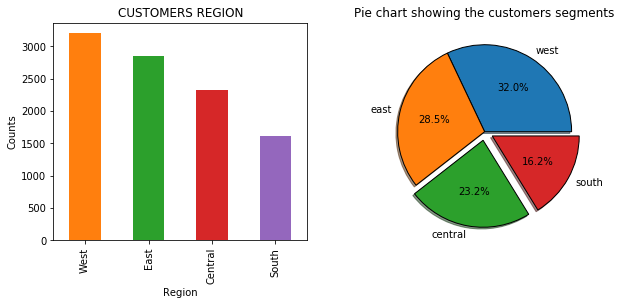

In [32]:
#Checking counts in our dataset with bar chart
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
store.region.value_counts().plot(kind='bar',title='CUSTOMERS REGION',color=['C1','C2','C3','C4']);
plt.xlabel('Region')
plt.ylabel('Counts');

plt.subplot(1,2,2);
reg_values=[3203,2848,2323,1620]
reg_labels=["west","east","central","south"]
plt.axis("equal")
plt.title("Pie chart showing the customers segments")
plt.pie(reg_values,labels=reg_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0,0,0.1,0.1],wedgeprops={'edgecolor':'black'});

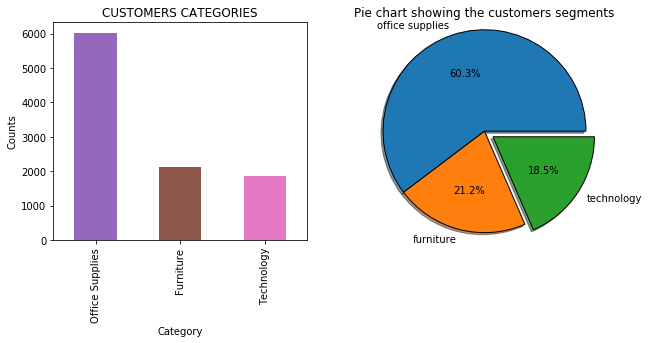

In [33]:
#Checking counts in our dataset with bar chart
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
store.category.value_counts().plot(kind='bar',title='CUSTOMERS CATEGORIES',color=['C4','C5','C6']);
plt.xlabel('Category')
plt.ylabel('Counts');

plt.subplot(1,2,2);
cat_values=[6026,2121,1847]
cat_labels=["office supplies","furniture","technology"]
plt.axis("equal")
plt.title("Pie chart showing the customers segments")
plt.pie(cat_values,labels=cat_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0,0,0.1],wedgeprops={'edgecolor':'black'});

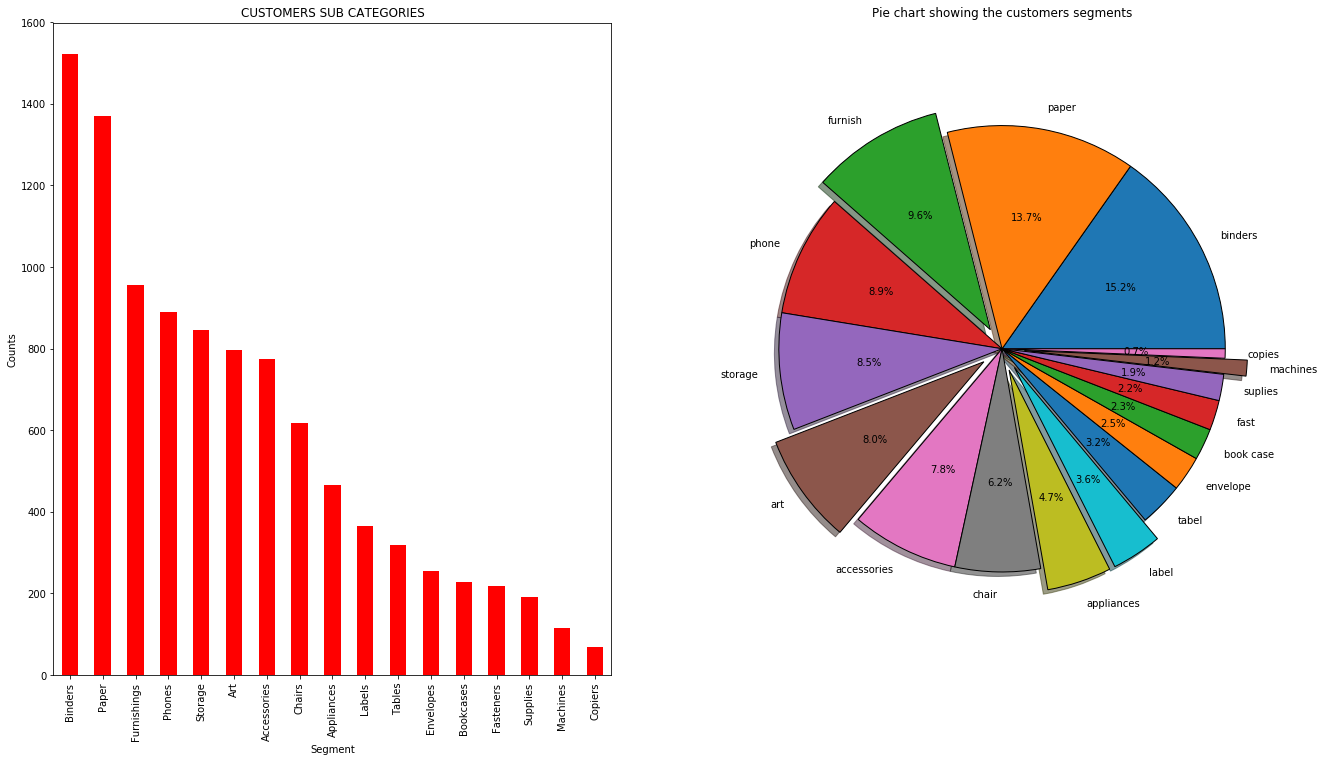

In [34]:
#Checking counts in our dataset with bar chart
plt.figure(figsize=(22,12))
plt.subplot(1,2,1);
store.sub_category.value_counts().plot(kind='bar',title='CUSTOMERS SUB CATEGORIES',color=['red']);
plt.xlabel('Segment')
plt.ylabel('Counts');

plt.subplot(1,2,2);
sub_values=[1523,1370,957,889,846,796,775,617,466,364,319,254,228,217,190,115,68]
sub_labels=["binders","paper","furnish","phone","storage","art","accessories","chair","appliances","label","tabel","envelope","book case","fast","suplies","machines","copies"]
plt.axis("equal")
plt.title("Pie chart showing the customers segments")
plt.pie(sub_values,labels=sub_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0,0,0.1,0,0,0.1,0,0,0.1,0.1,0,0,0,0,0,0.1,0],wedgeprops={'edgecolor':'black'});

## (2) Bivariate Exploration
**To start off with, I want to look at the pairwise correlations present between features in the data**

*Through these bivariates plots, we can learn how changes in one variable might affect the variable in the second, and identify clusters and patterns in the dataset*

In [35]:
numeric_vars = ['sales', 'quantity', 'discount','profit']
categoric_vars = ['ship_mode', 'segment', 'city','state','region','category','sub_category']

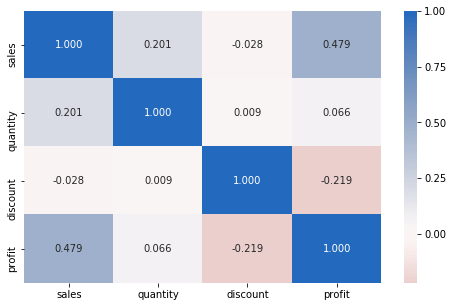

In [36]:
plt.figure(figsize = [8, 5])
sb.heatmap(store[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

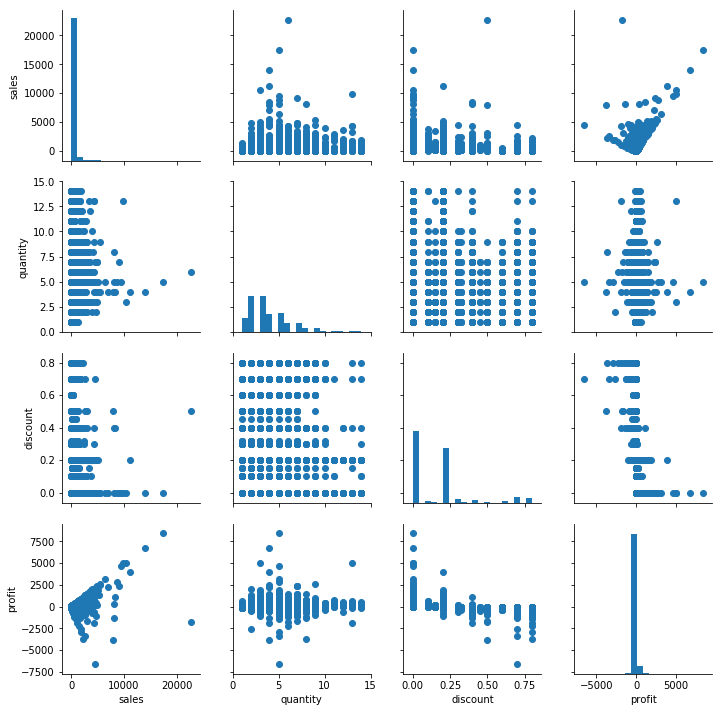

In [37]:
# plot matrix: checking relationship between the numerical variables in the dataset

g = sb.PairGrid(data = store, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

In [38]:
cat_vars = ['ship_mode', 'segment','region','category']

### Plot matrix of numeric features against categorical features.

<Figure size 15840x15840 with 0 Axes>

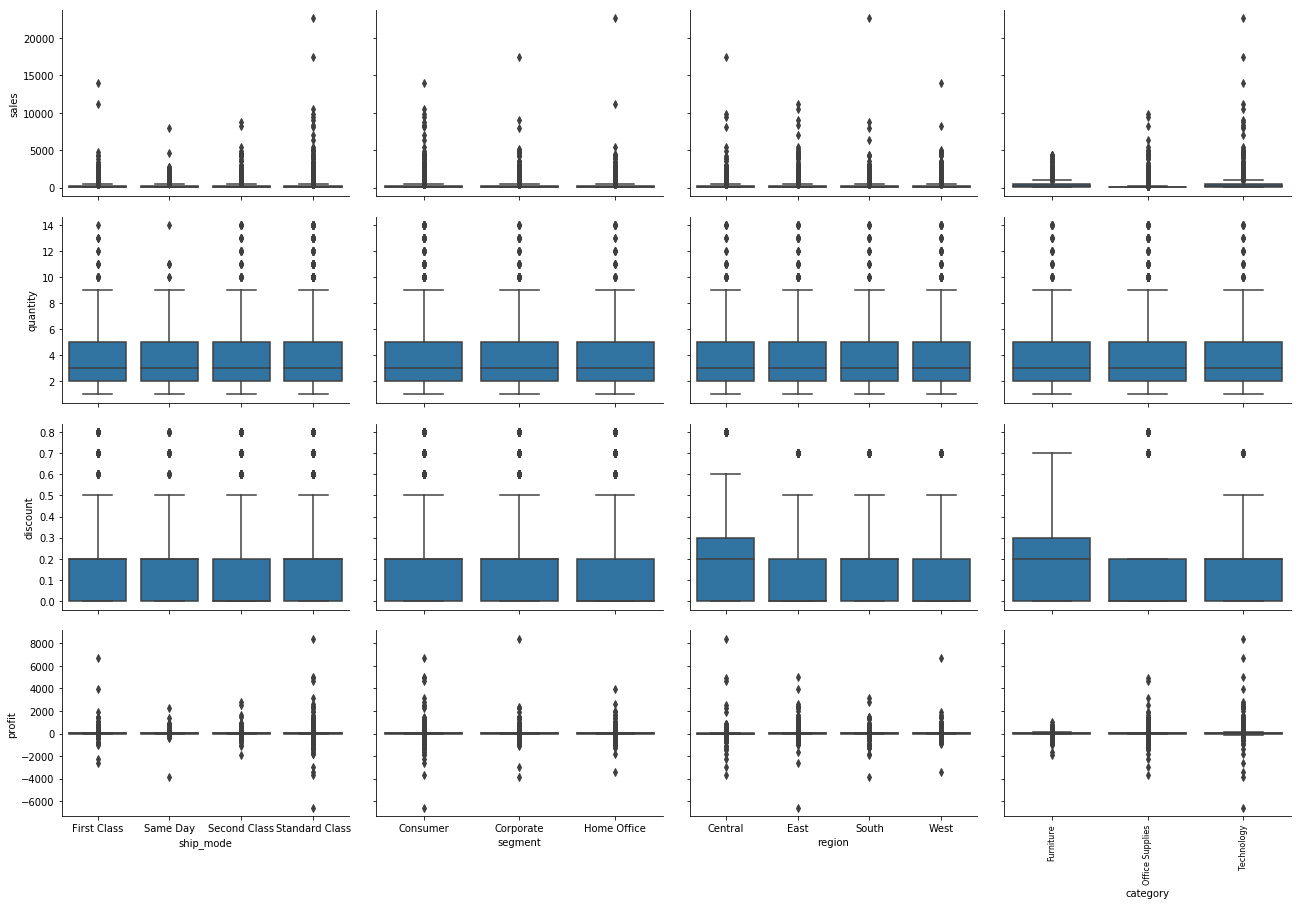

In [39]:
# can use a larger sample since there are fewer plots and they're simpler in nature.


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [220, 220])
g = sb.PairGrid(data = store, y_vars = ['sales', 'quantity', 'discount', 'profit'], x_vars = cat_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation='vertical',size=8)
plt.show();

### GROUPING TWO CATEGORICAL VARIABLES TOGETHER

#### (1)SHIP MODE VS SEGMENTS

In [40]:
#grouping two categorical variables together(ship mode vs segment)
byc=store.groupby("ship_mode").segment.value_counts()
byc

ship_mode       segment    
First Class     Consumer        769
                Corporate       485
                Home Office     284
Same Day        Consumer        317
                Corporate       114
                Home Office     112
Second Class    Consumer       1020
                Corporate       609
                Home Office     316
Standard Class  Consumer       3085
                Corporate      1812
                Home Office    1071
Name: segment, dtype: int64

In [41]:
#plotting clustered bar chart of ship mode vs segment
byc=byc.reset_index(name='count')
byc.pivot(index='ship_mode',columns='segment',values='count')

segment         Consumer  Corporate  Home Office
ship_mode                                       
First Class          769        485          284
Same Day             317        114          112
Second Class        1020        609          316
Standard Class      3085       1812         1071

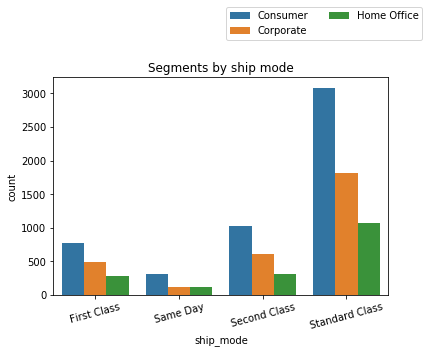

In [42]:
sb.countplot(data=store,x='ship_mode',hue='segment')
plt.xticks(rotation=15)
plt.legend(loc="lower left", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.title('Segments by ship mode');

#### (2)SHIP MODE VS REGION

In [43]:
#grouping two categorical variables together(ship mode vs region)
byd=store.groupby("ship_mode").region.value_counts()
byd

ship_mode       region 
First Class     West        515
                East        490
                Central     299
                South       234
Same Day        West        185
                East        155
                Central     120
                South        83
Second Class    West        621
                East        530
                Central     465
                South       329
Standard Class  West       1882
                East       1673
                Central    1439
                South       974
Name: region, dtype: int64

In [44]:
#plotting clustered bar chart of ship mode vs region
byd=byd.reset_index(name='count')
byd.pivot(index='ship_mode',columns='region',values='count')

region          Central  East  South  West
ship_mode                                 
First Class         299   490    234   515
Same Day            120   155     83   185
Second Class        465   530    329   621
Standard Class     1439  1673    974  1882

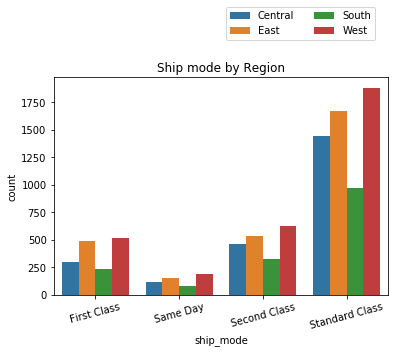

In [45]:
sb.countplot(data=store,x='ship_mode',hue='region')
plt.xticks(rotation=15)
plt.legend(loc="lower left", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.title('Ship mode by Region');

#### (3)SHIP MODE VS CATEGORT

In [46]:
#grouping two categorical variables together(ship mode vs category)
bye=store.groupby("ship_mode").category.value_counts()
bye

ship_mode       category       
First Class     Office Supplies     910
                Furniture           327
                Technology          301
Same Day        Office Supplies     326
                Furniture           119
                Technology           98
Second Class    Office Supplies    1152
                Furniture           427
                Technology          366
Standard Class  Office Supplies    3638
                Furniture          1248
                Technology         1082
Name: category, dtype: int64

In [47]:
#plotting clustered bar chart of ship mode vs category
bye=bye.reset_index(name='count')
bye.pivot(index='ship_mode',columns='category',values='count')

category        Furniture  Office Supplies  Technology
ship_mode                                             
First Class           327              910         301
Same Day              119              326          98
Second Class          427             1152         366
Standard Class       1248             3638        1082

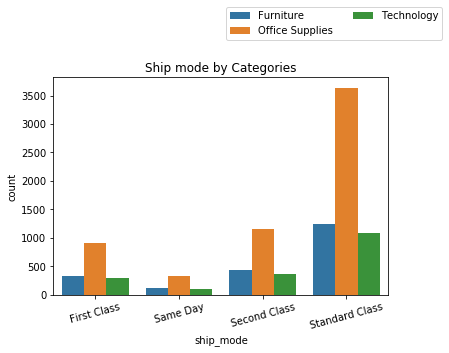

In [48]:
sb.countplot(data=store,x='ship_mode',hue='category')
plt.xticks(rotation=15)
plt.legend(loc="lower left", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.title('Ship mode by Categories');

#### (4)SHIP MODE VS SUB CATEGORIES

In [49]:
#grouping two categorical variables together(ship mode vs sub category)
byf=store.groupby("ship_mode").sub_category.value_counts()
byf

ship_mode       sub_category
First Class     Binders         239
                Paper           217
                Furnishings     146
                Phones          138
                Accessories     128
                Storage         119
                Art             112
                Chairs           85
                Appliances       76
                Labels           60
                Bookcases        49
                Tables           47
                Envelopes        32
                Fasteners        30
                Supplies         25
                Machines         23
                Copiers          12
Same Day        Paper            81
                Binders          74
                Furnishings      52
                Storage          52
                Phones           42
                Accessories      41
                Chairs           39
                Art              36
                Appliances       23
                Labels           21

In [50]:
#plotting clustered bar chart of ship mode vs sub category
byf=byf.reset_index(name='count')
byf.pivot(index='ship_mode',columns='sub_category',values='count')

sub_category    Accessories  Appliances  Art  Binders  Bookcases  Chairs  \
ship_mode                                                                  
First Class             128          76  112      239         49      85   
Same Day                 41          23   36       74          7      39   
Second Class            162          79  155      263         48     134   
Standard Class          444         288  493      947        124     359   

sub_category    Copiers  Envelopes  Fasteners  Furnishings  Labels  Machines  \
ship_mode                                                                      
First Class          12         32         30          146      60        23   
Same Day              5         14         14           52      21        10   
Second Class         15         53         37          184      62        14   
Standard Class       36        155        136          575     221        68   

sub_category    Paper  Phones  Storage  Supplies  Tables  
ship_mode                                                 
First Class       217     138      119        25      47  
Same Day           81      42       52        11      21  
Second Class      289     175      171        43      61  
Standard Class    783     534      504       111     190

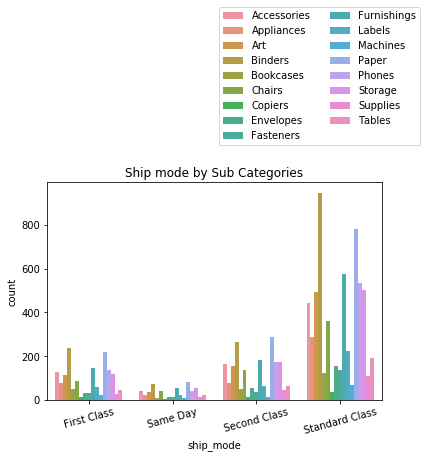

In [51]:
sb.countplot(data=store,x='ship_mode',hue='sub_category')
plt.xticks(rotation=15)
plt.legend(loc="lower left", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.title('Ship mode by Sub Categories');

#### (5)SEGMENTS VS REGION

In [52]:
#grouping two categorical variables together(segment vs region)
byg=store.groupby("segment").region.value_counts()
byg

segment      region 
Consumer     West       1672
             East       1469
             Central    1212
             South       838
Corporate    West        960
             East        877
             Central     673
             South       510
Home Office  West        571
             East        502
             Central     438
             South       272
Name: region, dtype: int64

In [53]:
#plotting clustered bar chart of segment vs region
byg=byg.reset_index(name='count')
byg.pivot(index='segment',columns='region',values='count')

region       Central  East  South  West
segment                                
Consumer        1212  1469    838  1672
Corporate        673   877    510   960
Home Office      438   502    272   571

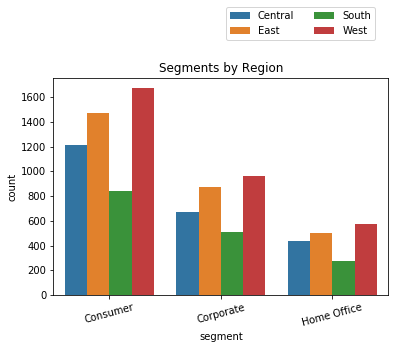

In [54]:
sb.countplot(data=store,x='segment',hue='region')
plt.xticks(rotation=15)
plt.legend(loc="lower left", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.title('Segments by Region');

#### (6)SEGMENT VS CATEGORY

In [55]:
#grouping two categorical variables together(segment vs categry)
byh=store.groupby("segment").category.value_counts()
byh

segment      category       
Consumer     Office Supplies    3127
             Furniture          1113
             Technology          951
Corporate    Office Supplies    1820
             Furniture           646
             Technology          554
Home Office  Office Supplies    1079
             Furniture           362
             Technology          342
Name: category, dtype: int64

In [56]:
#plotting clustered bar chart of segment vs category
byh=byh.reset_index(name='count')
byh.pivot(index='segment',columns='category',values='count')

category     Furniture  Office Supplies  Technology
segment                                            
Consumer          1113             3127         951
Corporate          646             1820         554
Home Office        362             1079         342

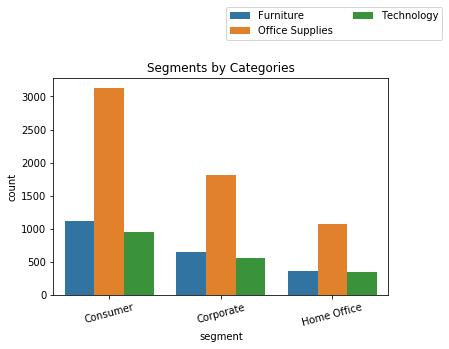

In [57]:
sb.countplot(data=store,x='segment',hue='category')
plt.xticks(rotation=15)
plt.legend(loc="lower left", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.title('Segments by Categories');

#### (7)SEGMENT VS SUB CATEGORY

In [58]:
#grouping two categorical variables together(segment vs sub categry)
byi=store.groupby("segment").sub_category.value_counts()
byi

segment      sub_category
Consumer     Binders         780
             Paper           693
             Furnishings     494
             Phones          451
             Storage         450
             Art             428
             Accessories     408
             Chairs          329
             Appliances      244
             Labels          189
             Tables          159
             Bookcases       131
             Envelopes       129
             Fasteners       114
             Supplies        100
             Machines         57
             Copiers          35
Corporate    Binders         473
             Paper           408
             Furnishings     288
             Phones          272
             Storage         260
             Accessories     227
             Art             218
             Chairs          188
             Appliances      155
             Tables          106
             Labels          102
             Envelopes        84
             Book

In [59]:
#plotting clustered bar chart of segment vs sub category
byi=byi.reset_index(name='count')
byi.pivot(index='segment',columns='sub_category',values='count')

sub_category  Accessories  Appliances  Art  Binders  Bookcases  Chairs  \
segment                                                                  
Consumer              408         244  428      780        131     329   
Corporate             227         155  218      473         64     188   
Home Office           140          67  150      270         33     100   

sub_category  Copiers  Envelopes  Fasteners  Furnishings  Labels  Machines  \
segment                                                                      
Consumer           35        129        114          494     189        57   
Corporate          20         84         59          288     102        35   
Home Office        13         41         44          175      73        23   

sub_category  Paper  Phones  Storage  Supplies  Tables  
segment                                                 
Consumer        693     451      450       100     159  
Corporate       408     272      260        61     106  
Home Office     269     166      136        29      54

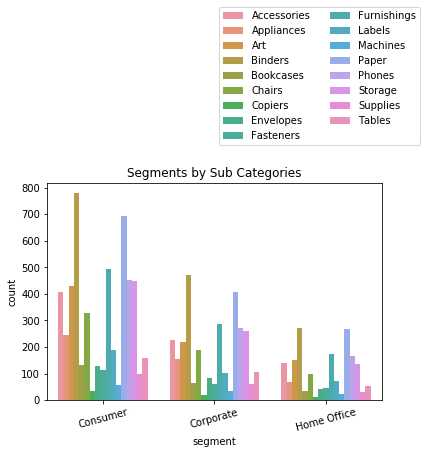

In [60]:
sb.countplot(data=store,x='segment',hue='sub_category')
plt.xticks(rotation=15)
plt.legend(loc="lower left", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.title('Segments by Sub Categories');

#### (8)REGION VS CATEGORY

In [61]:
#grouping two categorical variables together(region vs categry)
byj=store.groupby("region").category.value_counts()
byj

region   category       
Central  Office Supplies    1422
         Furniture           481
         Technology          420
East     Office Supplies    1712
         Furniture           601
         Technology          535
South    Office Supplies     995
         Furniture           332
         Technology          293
West     Office Supplies    1897
         Furniture           707
         Technology          599
Name: category, dtype: int64

In [62]:
#plotting clustered bar chart of region vs category
byj=byj.reset_index(name='count')
byj.pivot(index='region',columns='category',values='count')

category  Furniture  Office Supplies  Technology
region                                          
Central         481             1422         420
East            601             1712         535
South           332              995         293
West            707             1897         599

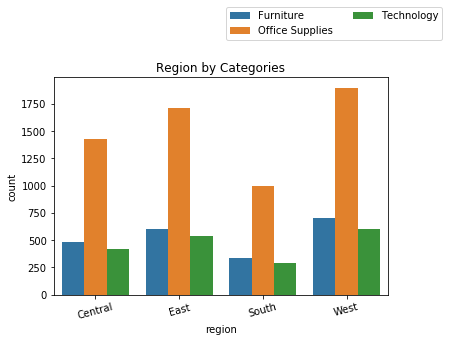

In [63]:
sb.countplot(data=store,x='region',hue='category')
plt.xticks(rotation=15)
plt.legend(loc="lower left", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.title('Region by Categories');

#### (9)REGION VS SUB CATEGORY

In [64]:
#grouping two categorical variables together(region vs sub categry)
byk=store.groupby("region").sub_category.value_counts()
byk

region   sub_category
Central  Binders         366
         Paper           321
         Storage         210
         Furnishings     205
         Phones          200
         Accessories     183
         Art             176
         Chairs          154
         Appliances      123
         Labels           76
         Tables           72
         Envelopes        59
         Fasteners        55
         Bookcases        50
         Supplies         36
         Machines         21
         Copiers          16
East     Binders         440
         Paper           378
         Furnishings     283
         Phones          272
         Storage         242
         Art             228
         Accessories     206
         Chairs          168
         Appliances      126
         Labels          107
         Tables           80
         Envelopes        74
         Bookcases        70
                        ... 
South    Phones          140
         Accessories     128
         Storage     

In [65]:
#plotting clustered bar chart of region vs sub category
byk=byk.reset_index(name='count')
byk.pivot(index='region',columns='sub_category',values='count')

sub_category  Accessories  Appliances  Art  Binders  Bookcases  Chairs  \
region                                                                   
Central               183         123  176      366         50     154   
East                  206         126  228      440         70     168   
South                 128          81  142      246         28      88   
West                  258         136  250      471         80     207   

sub_category  Copiers  Envelopes  Fasteners  Furnishings  Labels  Machines  \
region                                                                       
Central            16         59         55          205      76        21   
East               20         74         61          283     107        37   
South               7         54         29          165      65        18   
West               25         67         72          304     116        39   

sub_category  Paper  Phones  Storage  Supplies  Tables  
region                                                  
Central         321     200      210        36      72  
East            378     272      242        56      80  
South           221     140      128        29      51  
West            450     277      266        69     116

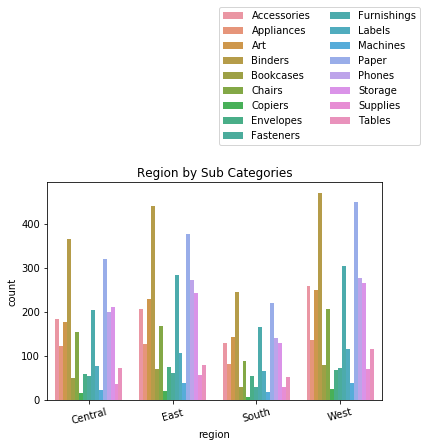

In [66]:
sb.countplot(data=store,x='region',hue='sub_category')
plt.xticks(rotation=15)
plt.legend(loc="lower left", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.title('Region by Sub Categories');

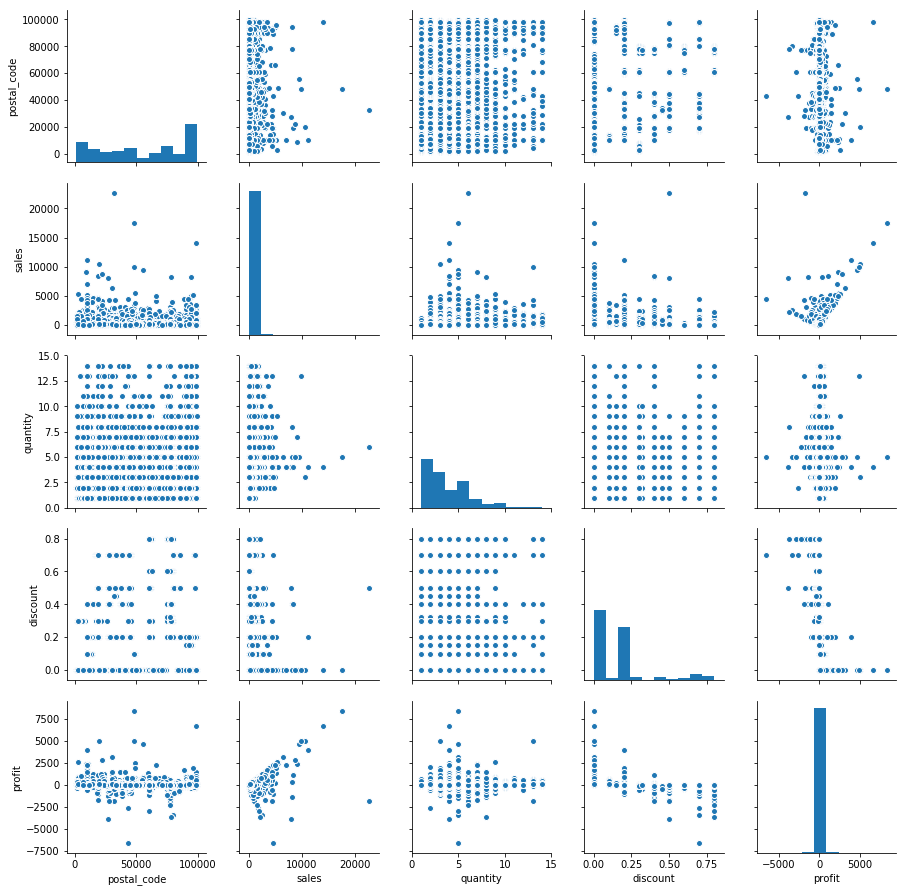

In [67]:
sb.pairplot(store)

# QUESTIONS

### What are the top segment by sales

In [68]:
#Grouping segment column
seg_sales=pd.DataFrame(store.groupby('segment').sum()['sales'])

In [69]:
#Sorting segment column
seg_sales=seg_sales.sort_values('sales',ascending=False)
seg_sales

sales
segment                  
Consumer     1.161401e+06
Corporate    7.061464e+05
Home Office  4.296531e+05

### What are the top ten city by sales

In [70]:
#Grouping city column
city_sales=pd.DataFrame(store.groupby('city').sum()['sales'])

In [71]:
#Sorting city column
city_sales=city_sales.sort_values('sales',ascending=False)
city_sales

sales
city                          
New York City      256368.1610
Los Angeles        175851.3410
Seattle            119540.7420
San Francisco      112669.0920
Philadelphia       109077.0130
Houston             64504.7604
Chicago             48539.5410
San Diego           47521.0290
Jacksonville        44713.1830
Springfield         43054.3420
Detroit             42446.9440
Columbus            38706.2430
Newark              28576.1190
Columbia            25283.3240
Lafayette           25036.2000
Jackson             24963.8580
San Antonio         21843.5280
Burlington          21668.0820
Arlington           20214.5320
Dallas              20131.9322
Lakewood            18192.0470
Richmond            18137.9300
Henderson           17549.0680
Atlanta             17197.8400
Minneapolis         16870.5400
Providence          15980.6500
Charlotte           13693.3390
Long Beach          13455.0300
Louisville          12345.8060
Denver              12198.7930
...                        ...
Bullhead City          22.2880
Tinley Park            22.2880
North Miami            22.1280
Loveland               20.9640
Altoona                20.4510
Antioch                19.4400
Norfolk                17.4300
Portage                16.2800
Grand Island           15.9600
Margate                15.5520
New Brunswick          14.7700
Arlington Heights      14.1120
Chapel Hill            14.0160
Rock Hill              11.8500
Baytown                10.3680
Iowa City               9.9900
Romeoville              8.9520
Billings                8.2880
Port Orange             7.8240
Deer Park               6.9240
Missouri City           6.3700
Keller                  6.0000
Layton                  4.9600
Springdale              4.3000
San Luis Obispo         3.6200
Ormond Beach            2.8080
Pensacola               2.2140
Jupiter                 2.0640
Elyria                  1.8240
Abilene                 1.3920

[531 rows x 1 columns]

In [72]:
#Top ten city by sales
top_city=city_sales[:10]
top_city

sales
city                      
New York City  256368.1610
Los Angeles    175851.3410
Seattle        119540.7420
San Francisco  112669.0920
Philadelphia   109077.0130
Houston         64504.7604
Chicago         48539.5410
San Diego       47521.0290
Jacksonville    44713.1830
Springfield     43054.3420

### What are the top ten sales by state

In [73]:
#Grouping state column
state_sales=pd.DataFrame(store.groupby('state').sum()['sales'])

In [74]:
#Sorting state column
state_sales=state_sales.sort_values('sales',ascending=False)
state_sales

sales
state                            
California            457687.6315
New York              310876.2710
Texas                 170188.0458
Washington            138641.2700
Pennsylvania          116511.9140
Florida                89473.7080
Illinois               80166.1010
Ohio                   78258.1360
Michigan               76269.6140
Virginia               70636.7200
North Carolina         55603.1640
Indiana                53555.3600
Georgia                49095.8400
Kentucky               36591.7500
New Jersey             35764.3120
Arizona                35282.0010
Wisconsin              32114.6100
Colorado               32108.1180
Tennessee              30661.8730
Minnesota              29863.1500
Massachusetts          28634.4340
Delaware               27451.0690
Maryland               23705.5230
Rhode Island           22627.9560
Missouri               22205.1500
Oklahoma               19683.3900
Alabama                19510.6400
Oregon                 17431.1500
Nevada                 16729.1020
Connecticut            13384.3570
Arkansas               11678.1300
Utah                   11220.0560
Mississippi            10771.3400
Louisiana               9217.0300
Vermont                 8929.3700
South Carolina          8481.7100
Nebraska                7464.9300
New Hampshire           7292.5240
Montana                 5589.3520
New Mexico              4783.5220
Iowa                    4579.7600
Idaho                   4382.4860
Kansas                  2914.3100
District of Columbia    2865.0200
Wyoming                 1603.1360
South Dakota            1315.5600
Maine                   1270.5300
West Virginia           1209.8240
North Dakota             919.9100

In [75]:
#Top ten state by sales
state_sales[:10]

sales
state                    
California    457687.6315
New York      310876.2710
Texas         170188.0458
Washington    138641.2700
Pennsylvania  116511.9140
Florida        89473.7080
Illinois       80166.1010
Ohio           78258.1360
Michigan       76269.6140
Virginia       70636.7200

### Which region have the highest number of sales?

In [76]:
#Grouping region column
region_sales=pd.DataFrame(store.groupby('region').sum()['sales'])

In [77]:
#Sorting region column
#Top region by sales
region_sales=region_sales.sort_values('sales',ascending=False)
region_sales

sales
region              
West     725457.8245
East     678781.2400
Central  501239.8908
South    391721.9050

In [78]:
result=store.groupby('region').sum()
result

postal_code        sales  quantity  discount       profit
region                                                            
Central    151786150  501239.8908      8780    558.34   39706.3625
East        50171698  678781.2400     10618    414.00   91522.7800
South       55875052  391721.9050      6209    238.55   46749.4303
West       293739752  725457.8245     12266    350.20  108418.4489

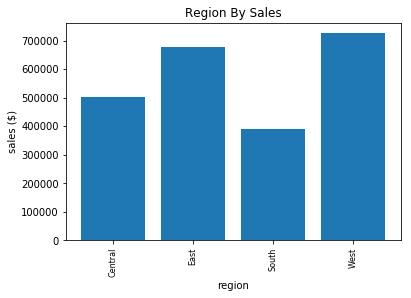

In [79]:
reg=[region for region, store in store.groupby('region')]

plt.bar(reg,result['sales'])
plt.xticks(reg, rotation='vertical',size=8);
plt.ylabel('sales ($)')
plt.xlabel('region')
plt.title('Region By Sales');

### Top category by sales

In [80]:
#Grouping category column
category_sales=pd.DataFrame(store.groupby('category').sum()['sales'])

In [81]:
#Sorting region column
#Top category by sales
category_sales=category_sales.sort_values('sales',ascending=False)
category_sales

sales
category                    
Technology       836154.0330
Furniture        741999.7953
Office Supplies  719047.0320

In [82]:
res=store.groupby('category').sum()
res

postal_code        sales  quantity  discount       profit
category                                                                  
Furniture          118196026  741999.7953      8028    368.89   18451.2728
Office Supplies    330772872  719047.0320     22906    947.80  122490.8008
Technology         102603754  836154.0330      6939    244.40  145454.9481

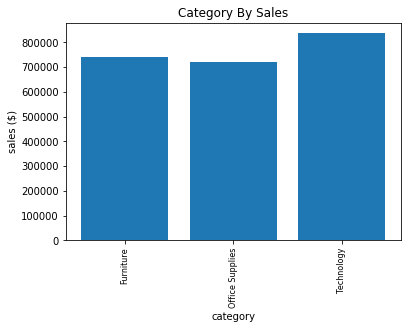

In [83]:
cat=[category for category, store in store.groupby('category')]

plt.bar(cat,res['sales'])
plt.xticks(cat, rotation='vertical',size=8);
plt.ylabel('sales ($)')
plt.xlabel('category')
plt.title('Category By Sales');

### Top sub category by sales

In [84]:
#Grouping category column
subcategory_sales=pd.DataFrame(store.groupby('sub_category').sum()['sales'])

In [85]:
#Sorting region column
#Top subcategory by sales
subcategory_sales=subcategory_sales.sort_values('sales',ascending=False)
subcategory_sales

sales
sub_category             
Phones        330007.0540
Chairs        328449.1030
Storage       223843.6080
Tables        206965.5320
Binders       203412.7330
Machines      189238.6310
Accessories   167380.3180
Copiers       149528.0300
Bookcases     114879.9963
Appliances    107532.1610
Furnishings    91705.1640
Paper          78479.2060
Supplies       46673.5380
Art            27118.7920
Envelopes      16476.4020
Labels         12486.3120
Fasteners       3024.2800

In [86]:
results=store.groupby('sub_category').sum()
results

postal_code        sales  quantity  discount      profit
sub_category                                                          
Accessories      44468434  167380.3180      2976     60.80  41936.6357
Appliances       25250538  107532.1610      1729     77.60  18138.0054
Art              43329658   27118.7920      3000     59.60   6527.7870
Binders          83626398  203412.7330      5974    567.00  30221.7633
Bookcases        12771539  114879.9963       868     48.14  -3472.5560
Chairs           34936229  328449.1030      2356    105.00  26590.1663
Copiers           3873477  149528.0300       234     11.00  55617.8249
Envelopes        13325731   16476.4020       906     20.40   6964.1767
Fasteners        12506063    3024.2800       914     17.80    949.5182
Furnishings      51880430   91705.1640      3563    132.40  13059.1436
Labels           19552985   12486.3120      1400     25.00   5546.2540
Machines          6364668  189238.6310       440     35.20   3384.7569
Paper            76299221   78479.2060      5178    102.60  34053.5693
Phones           47897175  330007.0540      3289    137.40  44515.7306
Storage          46248720  223843.6080      3158     63.20  21278.8264
Supplies         10633558   46673.5380       647     14.60  -1189.0995
Tables           18607828  206965.5320      1241     83.35 -17725.4811

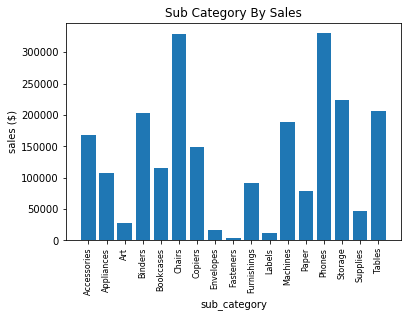

In [87]:
sub=[sub_category for sub_category, store in store.groupby('sub_category')]

plt.bar(sub,results['sales'])
plt.xticks(sub, rotation='vertical',size=8);
plt.ylabel('sales ($)')
plt.xlabel('sub_category')
plt.title('Sub Category By Sales');

### Which are the most selling segment by quantity

In [88]:
#Grouping segment column
se_sales=pd.DataFrame(store.groupby('segment').sum()['quantity'])

In [89]:
#Sorting segment column
se_sales=se_sales.sort_values('quantity',ascending=False)
se_sales

quantity
segment              
Consumer        19521
Corporate       11608
Home Office      6744

### Which are the most selling city by quantity 

In [90]:
#Grouping city column
cit_sales=pd.DataFrame(store.groupby('city').sum()['quantity'])

In [91]:
#Sorting city column
cit_sales=cit_sales.sort_values('quantity',ascending=False)
cit_sales

quantity
city                     
New York City        3417
Los Angeles          2879
Philadelphia         1981
San Francisco        1935
Seattle              1590
Houston              1466
Chicago              1132
Columbus              836
San Diego             670
Springfield           649
Dallas                555
Detroit               441
Jacksonville          429
Newark                362
Richmond              336
Jackson               318
Columbia              316
Arlington             259
Aurora                258
Long Beach            256
San Antonio           247
Charlotte             243
Phoenix               224
Louisville            221
Miami                 215
Lakewood              204
Milwaukee             201
Henderson             198
Fairfield             185
Baltimore             184
...                   ...
Chapel Hill             3
Santa Maria             3
Citrus Heights          3
Commerce City           3
Coachella               3
Jefferson City          2
Montebello              2
Abilene                 2
Manhattan               2
Melbourne               2
Kissimmee               2
Missoula                2
Keller                  2
Grand Island            2
Portage                 2
San Luis Obispo         2
Holyoke                 2
Billings                2
Atlantic City           2
Conway                  2
Danbury                 2
Springdale              2
Romeoville              2
Baytown                 2
Jupiter                 1
Iowa City               1
Port Orange             1
Lindenhurst             1
Littleton               1
Elyria                  1

[531 rows x 1 columns]

In [92]:
#Top ten city by sales
cit_sales[:10]

quantity
city                   
New York City      3417
Los Angeles        2879
Philadelphia       1981
San Francisco      1935
Seattle            1590
Houston            1466
Chicago            1132
Columbus            836
San Diego           670
Springfield         649

### What is the most preferred ship mode

In [93]:
#Checking number of ship mode in the superstore dataset
pd.DataFrame(store.ship_mode.value_counts())

ship_mode
Standard Class       5968
Second Class         1945
First Class          1538
Same Day              543

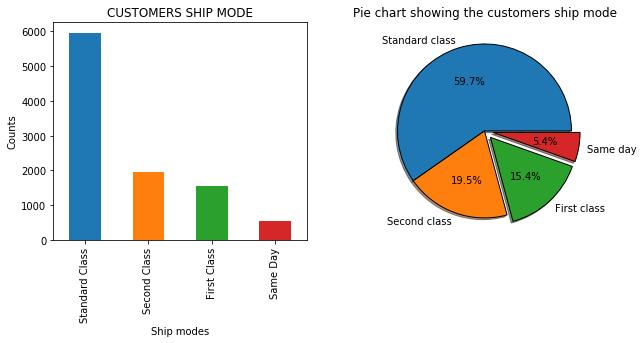

In [94]:
#Checking counts in our dataset with bar chart
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
store.ship_mode.value_counts().plot(kind='bar',title='CUSTOMERS SHIP MODE',color=['C0','C1','C2','C3']);
plt.xlabel('Ship modes')
plt.ylabel('Counts');

plt.subplot(1,2,2);
txn_values=[5968,1945,1538,543]
txn_labels=["Standard class","Second class","First class","Same day"]
plt.axis("equal")
plt.title("Pie chart showing the customers ship mode")
plt.pie(txn_values,labels=txn_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0,0,0.1,0.1],wedgeprops={'edgecolor':'black'});

### Which are the most profitable category and sub category

In [95]:
cat_pro=pd.DataFrame(store.groupby(['category','sub_category']).sum()['profit'])
cat_pro

profit
category        sub_category            
Furniture       Accessories          NaN
                Appliances           NaN
                Art                  NaN
                Binders              NaN
                Bookcases     -3472.5560
                Chairs        26590.1663
                Copiers              NaN
                Envelopes            NaN
                Fasteners            NaN
                Furnishings   13059.1436
                Labels               NaN
                Machines             NaN
                Paper                NaN
                Phones               NaN
                Storage              NaN
                Supplies             NaN
                Tables       -17725.4811
Office Supplies Accessories          NaN
                Appliances    18138.0054
                Art            6527.7870
                Binders       30221.7633
                Bookcases            NaN
                Chairs               NaN
                Copiers              NaN
                Envelopes      6964.1767
                Fasteners       949.5182
                Furnishings          NaN
                Labels         5546.2540
                Machines             NaN
                Paper         34053.5693
                Phones               NaN
                Storage       21278.8264
                Supplies      -1189.0995
                Tables               NaN
Technology      Accessories   41936.6357
                Appliances           NaN
                Art                  NaN
                Binders              NaN
                Bookcases            NaN
                Chairs               NaN
                Copiers       55617.8249
                Envelopes            NaN
                Fasteners            NaN
                Furnishings          NaN
                Labels               NaN
                Machines       3384.7569
                Paper                NaN
                Phones        44515.7306
                Storage              NaN
                Supplies             NaN
                Tables               NaN

In [96]:
#Replace Nan with zero(0)
cat_pro=cat_pro.replace(np.nan, 0)
cat_pro

profit
category        sub_category            
Furniture       Accessories       0.0000
                Appliances        0.0000
                Art               0.0000
                Binders           0.0000
                Bookcases     -3472.5560
                Chairs        26590.1663
                Copiers           0.0000
                Envelopes         0.0000
                Fasteners         0.0000
                Furnishings   13059.1436
                Labels            0.0000
                Machines          0.0000
                Paper             0.0000
                Phones            0.0000
                Storage           0.0000
                Supplies          0.0000
                Tables       -17725.4811
Office Supplies Accessories       0.0000
                Appliances    18138.0054
                Art            6527.7870
                Binders       30221.7633
                Bookcases         0.0000
                Chairs            0.0000
                Copiers           0.0000
                Envelopes      6964.1767
                Fasteners       949.5182
                Furnishings       0.0000
                Labels         5546.2540
                Machines          0.0000
                Paper         34053.5693
                Phones            0.0000
                Storage       21278.8264
                Supplies      -1189.0995
                Tables            0.0000
Technology      Accessories   41936.6357
                Appliances        0.0000
                Art               0.0000
                Binders           0.0000
                Bookcases         0.0000
                Chairs            0.0000
                Copiers       55617.8249
                Envelopes         0.0000
                Fasteners         0.0000
                Furnishings       0.0000
                Labels            0.0000
                Machines       3384.7569
                Paper             0.0000
                Phones        44515.7306
                Storage           0.0000
                Supplies          0.0000
                Tables            0.0000

In [97]:
#Most profitable category and sub category
cat_pro.sort_values(['category','profit'],ascending=False)

profit
category        sub_category            
Technology      Copiers       55617.8249
                Phones        44515.7306
                Accessories   41936.6357
                Machines       3384.7569
                Appliances        0.0000
                Art               0.0000
                Binders           0.0000
                Bookcases         0.0000
                Chairs            0.0000
                Envelopes         0.0000
                Fasteners         0.0000
                Furnishings       0.0000
                Labels            0.0000
                Paper             0.0000
                Storage           0.0000
                Supplies          0.0000
                Tables            0.0000
Office Supplies Paper         34053.5693
                Binders       30221.7633
                Storage       21278.8264
                Appliances    18138.0054
                Envelopes      6964.1767
                Art            6527.7870
                Labels         5546.2540
                Fasteners       949.5182
                Accessories       0.0000
                Bookcases         0.0000
                Chairs            0.0000
                Copiers           0.0000
                Furnishings       0.0000
                Machines          0.0000
                Phones            0.0000
                Tables            0.0000
                Supplies      -1189.0995
Furniture       Chairs        26590.1663
                Furnishings   13059.1436
                Accessories       0.0000
                Appliances        0.0000
                Art               0.0000
                Binders           0.0000
                Copiers           0.0000
                Envelopes         0.0000
                Fasteners         0.0000
                Labels            0.0000
                Machines          0.0000
                Paper             0.0000
                Phones            0.0000
                Storage           0.0000
                Supplies          0.0000
                Bookcases     -3472.5560
                Tables       -17725.4811